In [1]:
from statistics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
import sklearn
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
#อ่านไฟล์
data=pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00


# จัดการ DATA

In [3]:
#เช็คจำนวน row, columns
data.shape

(1500014, 15)

In [4]:
#ลบ columns 'Unnamed: 0'
data=data.drop(columns=['Unnamed: 0'])
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN
1500010,Australia and Oceania,NaN,Household,Online,L,12/5/2016,937431466,12/8/2016,5657,668.27,502.54,3780403.39,2842868.78,937534.61
1500011,Central America and the Caribbean,NaN,Household,Offline,C,11/19/2011,274930989,12/13/2011,7044,668.27,502.54,4707293.88,3539891.76,1167402.12
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN


In [5]:
#แสดงข้อมูลทั้งหมด
data.describe().round(2)

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.500014e+06,1500014.00,1500014.00,1500014.00,1500009.00,1500009.00,1.500009e+06
mean,5.500679e+08,4999.30,266.05,187.55,1329889.20,937489.14,5.939205e+07
std,2.599833e+08,2885.55,217.00,175.67,1468814.34,1149109.12,7.144790e+10
min,1.000012e+08,1.00,9.33,6.92,9.33,6.92,2.410000e+00
25%,3.246868e+08,2501.00,81.73,35.84,277718.54,161817.60,9.506640e+04
50%,5.497915e+08,4998.00,154.06,97.44,785329.26,467357.49,2.813704e+05
75%,7.756273e+08,7498.00,421.89,263.33,1821933.36,1196571.52,5.654252e+05
max,9.999999e+08,10000.00,668.27,524.96,6682700.00,5249600.00,8.750000e+13


In [6]:
data.info

<bound method DataFrame.info of                                     Region           Country  Item Type  \
0                       Sub-Saharan Africa      South Africa     Fruits   
1                       Sub-Saharan Africa      South Africa     Fruits   
2             Middle East and North Africa           Morocco    Clothes   
3             Middle East and North Africa           Morocco    Clothes   
4                    Australia and Oceania  Papua New Guinea       Meat   
...                                    ...               ...        ...   
1500009                               Asia             India     Snacks   
1500010              Australia and Oceania               NaN  Household   
1500011  Central America and the Caribbean               NaN  Household   
1500012                               Asia            Brunei     Cereal   
1500013       Middle East and North Africa            Israel  Beverages   

        Sales Channel Order Priority  Order Date   Order ID   Ship 

In [7]:
#ลบ row 'Country'  ที่มีค่า None
data=data[data['Country'].notnull()]
data.shape

(1500008, 14)

In [8]:
#เปลี่ยนชื่อ columns 'Item Type'
data=data.rename(columns={'Item Type':'Item_Type'})
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00


In [9]:
list(data.columns)

['Region',
 'Country',
 'Item_Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [10]:
#สร้าง New columns
data['%margin']=((data['Total Profit']/data['Total Revenue']*100).round(2))
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56


In [11]:
#สร้าง Function ที่จะนำไปใช้
def if_condition(row):
    if row['%margin']>30:
        val='good'
    else :
        val='bed'
    return val

In [12]:
#เอา Columns ใหม่ และนำ Function มาใช้
data['dicision']=data.apply(if_condition,axis=1)

In [13]:
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bed


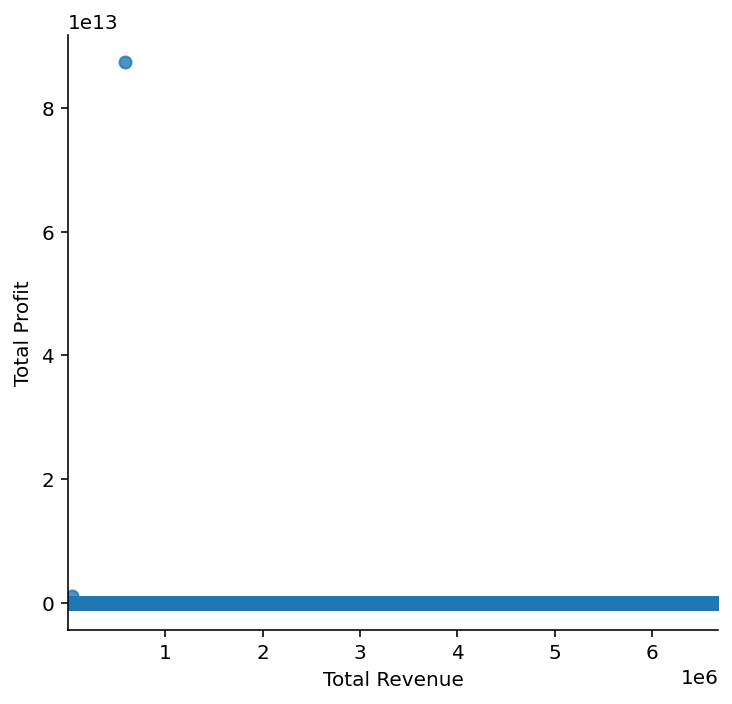

In [14]:
#Plot กราฟเพื่อดูความแตกต่าง Data
sns.lmplot(x='Total Revenue',y='Total Profit',data=data,ci=None)

In [15]:
#หาค่า max ของ 'Total Profit'
data.loc[data['Total Profit'].idxmax()]

Region            Sub-Saharan Africa
Country                        Ghana
Item_Type            Office Supplies
Sales Channel                    NaN
Order Priority                     L
Order Date                 3/23/2017
Order ID                   601245963
Ship Date                  4/15/2017
Units Sold                       896
Unit Price                    651.21
Unit Cost                     524.96
Total Revenue              583484.16
Total Cost                 470364.16
Total Profit        87500000000000.0
%margin           14996122602.540001
dicision                        good
Name: 1500003, dtype: object

In [16]:
#แสดงค่า มากไปน้อย ของ 'Total Profit'  5อันดับแรก
data.sort_values('Total Profit',ascending=False).head(5)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1500003,Sub-Saharan Africa,Ghana,Office Supplies,NaN,L,3/23/2017,601245963,4/15/2017,896,651.21,524.96,583484.16,470364.16,8.750000e+13,1.499612e+10,good
1500005,Sub-Saharan Africa,Uganda,Personal Care,Online,M,6/19/2014,539471471,7/21/2014,451,81.73,56.67,36860.23,25558.17,1.000000e+12,2.712951e+09,good
897995,Asia,Maldives,Cosmetics,Online,H,4/12/2016,340228402,5/23/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good


In [17]:
#ลบค่าที่ทีความผิดปกติ
data=data.drop(1500005)
data=data.drop(1500003)

In [18]:
#เช็ค
data.sort_values('Total Profit',ascending=False).head(5)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
1180739,Europe,Sweden,Cosmetics,Offline,L,6/12/2016,383685767,7/24/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
583126,Asia,Maldives,Cosmetics,Online,H,4/11/2016,340228402,5/22/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good


In [19]:
data.sort_values('Total Profit',ascending=True).head(5)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed
965759,Sub-Saharan Africa,Malawi,Fruits,Offline,C,5/18/2013,779397857,6/29/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed
576730,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed


In [20]:
#เรียง Data จากล่างขึ้นบน
data.tail(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1499996,Australia and Oceania,Samoa,Snacks,Offline,M,8/21/2013,346272170,9/11/2013,8485,152.58,97.44,1294641.30,826778.40,467862.90,36.14,good
1499997,Europe,Denmark,Baby Food,Online,L,2/27/2017,458885467,3/23/2017,3262,255.28,159.42,832723.36,520028.04,312695.32,37.55,good
1499998,Middle East and North Africa,Jordan,Cereal,Offline,L,5/27/2012,925852906,6/22/2012,9304,205.70,117.11,1913832.80,1089591.44,824241.36,43.07,good
1499999,Sub-Saharan Africa,Djibouti,Fruits,Online,H,9/1/2013,385552585,9/7/2013,2432,9.33,6.92,22690.56,16829.44,5861.12,25.83,bed
1500004,NaN,Tanzania,Cosmetics,Offline,L,5/23/2016,739008080,5/24/2016,7768,437.20,263.33,3396169.60,2045547.44,1350622.16,39.77,good
1500006,Sub-Saharan Africa,Zimbabwe,Office Supplies,Offline,C,3/28/2011,953361213,4/8/2011,9623,651.21,524.96,NaN,NaN,NaN,NaN,bed
1500008,Australia and Oceania,Vanuatu,Fruits,Online,C,11/3/2013,571997869,11/11/2013,5735,9.33,6.92,NaN,NaN,NaN,NaN,bed
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN,NaN,bed
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN,NaN,bed
1500013,Middle East and North Africa,Israel,Beverages,Offline,H,9/8/2013,371502530,10/13/2013,4709,47.45,31.79,NaN,NaN,NaN,NaN,bed


In [21]:
#เช็คหาค่า NaN
data.isnull().sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     5
Total Cost        5
Total Profit      5
%margin           5
dicision          0
dtype: int64

In [22]:
#คำนวณหาค่าใหม่
data['Total Revenue']=(data['Units Sold']*data['Unit Price']).round(2)
data['Total Cost']=(data['Units Sold']*data['Unit Cost']).round(2)
data['Total Profit']=(data['Total Revenue']-data['Total Cost']).round(2)
data['%margin']=((data['Total Profit']/data['Total Revenue'])*100).round(2)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500006 entries, 0 to 1500013
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1500005 non-null  object 
 1   Country         1500006 non-null  object 
 2   Item_Type       1500006 non-null  object 
 3   Sales Channel   1500006 non-null  object 
 4   Order Priority  1500006 non-null  object 
 5   Order Date      1500006 non-null  object 
 6   Order ID        1500006 non-null  int64  
 7   Ship Date       1500006 non-null  object 
 8   Units Sold      1500006 non-null  int64  
 9   Unit Price      1500006 non-null  float64
 10  Unit Cost       1500006 non-null  float64
 11  Total Revenue   1500006 non-null  float64
 12  Total Cost      1500006 non-null  float64
 13  Total Profit    1500006 non-null  float64
 14  %margin         1500006 non-null  float64
 15  dicision        1500006 non-null  object 
dtypes: float64(6), int64(2), object(8)
m

In [24]:
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bed


In [25]:
data.isnull().sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
%margin           0
dicision          0
dtype: int64

In [26]:
#สร้าง columns 'year'
data['year']=pd.DatetimeIndex(data['Order Date']).year

In [27]:
#สร้าง columns 'month'
data['month']=pd.DatetimeIndex(data['Order Date']).month

In [28]:
#เปลี่ยนชื่อใน columns 'month
data=data.replace({'month':{1:'1.January',
                                          2:'2.February',
                                          3:'3.March',
                                          4:'4.April',
                                          5:'5.May',
                                          6:'6.June',
                                          7:'7.July',
                                          8:'8.August',
                                          9:'9.September',
                                          10: '10.October',
                                          11:'11.November',
                                          12:'12.December'}})

In [29]:
#แสดง Data ที่ได้
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed,2012,7.July
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed,2012,7.July
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9.September
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9.September
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bed,2015,5.May


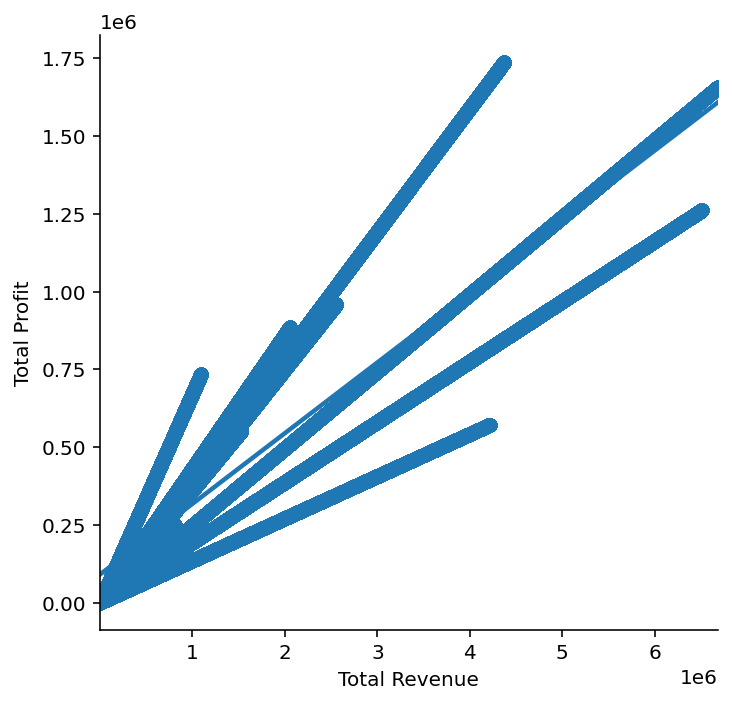

In [30]:
#Plot กราฟมาตรวจสอบ
sns.lmplot(x='Total Revenue',y='Total Profit',data=data,ci=None)

# วิเคราะห์ DATA

In [31]:
#วิเคราะห์ Data
data.sort_values('Total Profit',ascending=True)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
576729,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,6.June
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,9.September
669807,Central America and the Caribbean,Grenada,Fruits,Online,H,5/10/2013,901761090,6/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,5.May
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,5.May
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,5.May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
1180739,Europe,Sweden,Cosmetics,Offline,L,6/12/2016,383685767,7/24/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,6.June
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,3.March


In [32]:
data.sort_values('Total Profit',ascending=False)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
342508,Sub-Saharan Africa,Comoros,Cosmetics,Online,H,6/20/2016,261322534,6/25/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,6.June
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4.April
1218962,Sub-Saharan Africa,Botswana,Cosmetics,Offline,C,3/25/2016,584954869,4/6/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,3.March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,7.July
576730,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,6.June
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,7.July
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bed,2013,7.July


In [33]:
data.sort_values('%margin',ascending=False)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.20,good,2014,2.February
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.20,good,2011,2.February
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.20,good,2010,3.March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.20,good,2013,6.June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.20,good,2011,7.July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350837,Europe,Ireland,Meat,Offline,M,10/6/2014,573015391,11/3/2014,6843,421.89,364.69,2886993.27,2495573.67,391419.60,13.56,bed,2014,10.October
1024564,Middle East and North Africa,Afghanistan,Meat,Offline,M,6/11/2013,429389321,7/11/2013,4697,421.89,364.69,1981617.33,1712948.93,268668.40,13.56,bed,2013,6.June
111152,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,bed,2011,3.March
111153,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,bed,2011,3.March


In [34]:
#เช็คค่าต่างๆ
data['Total Profit'][data['Country']=='South Korea'].sum()

3194318738.0699997

In [35]:
data['Total Profit'][data['Country']=='South Korea'].apply(lambda x:'{:,}'.format(x))

73          408,465.2
74          408,465.2
160         14,418.51
161         14,418.51
223        717,288.48
              ...    
1499100     101,476.8
1499371      4,933.27
1499481    249,949.62
1499810     362,545.5
1499903    549,110.88
Name: Total Profit, Length: 8104, dtype: object

In [36]:
#ใช้ Groupby หาค่า
data.groupby(['Country','month','Item_Type','Order ID']).sum()

Units Sold  Unit Price  \
Country     month       Item_Type  Order ID                            
Afghanistan 1.January   Baby Food  109513795        6420      255.28   
                                   130793797        3646      255.28   
                                   151045119        6462      255.28   
                                   162812507        8694      255.28   
                                   173353803        8097      255.28   
...                                                  ...         ...   
Zimbabwe    9.September Vegetables 893002068        8011      154.06   
                                   967383372        9092      154.06   
                                   977924668        8496      154.06   
                                   987577617        5018      154.06   
                                   998118913        4422      154.06   

                                              Unit Cost  Total Revenue  \
Country     month       Item_Type  Order ID                              
Afghanistan 1.January   Baby Food  109513795     159.42     1638897.60   
                                   130793797     159.42      930750.88   
                                   151045119     159.42     1649619.36   
                                   162812507     159.42     2219404.32   
                                   173353803     159.42     2067002.16   
...                                                 ...            ...   
Zimbabwe    9.September Vegetables 893002068      90.93     1234174.66   
                                   967383372      90.93     1400713.52   
                                   977924668      90.93     1308893.76   
                                   987577617      90.93      773073.08   
                                   998118913      90.93      681253.32   

                                              Total Cost  Total Profit  \
Country     month       Item_Type  Order ID                              
Afghanistan 1.January   Baby Food  109513795  1023476.40     615421.20   
                                   130793797   581245.32     349505.56   
                                   151045119  1030172.04     619447.32   
                                   162812507  1385997.48     833406.84   
                                   173353803  1290823.74     776178.42   
...                                                  ...           ...   
Zimbabwe    9.September Vegetables 893002068   728440.23     505734.43   
                                   967383372   826735.56     573977.96   
                                   977924668   772541.28     536352.48   
                                   987577617   456286.74     316786.34   
                                   998118913   402092.46     279160.86   

                                              %margin  year  
Country     month       Item_Type  Order ID                  
Afghanistan 1.January   Baby Food  109513795    37.55  2012  
                                   130793797    37.55  2017  
                                   151045119    37.55  2010  
                                   162812507    37.55  2010  
                                   173353803    37.55  2012  
...                                               ...   ...  
Zimbabwe    9.September Vegetables 893002068    40.98  2011  
                                   967383372    40.98  2013  
                                   977924668    40.98  2015  
                                   987577617    40.98  2012  
                                   998118913    40.98  2014  

[1285479 rows x 8 columns]

In [37]:
data.groupby(['Country','Item_Type']) ['Total Profit'].sum()

Country      Item_Type      
Afghanistan  Baby Food          3.318292e+08
             Beverages          5.207576e+07
             Cereal             2.911936e+08
             Clothes            2.400776e+08
             Cosmetics          5.684838e+08
                                    ...     
Zimbabwe     Meat               1.907654e+08
             Office Supplies    4.377148e+08
             Personal Care      8.798709e+07
             Snacks             1.870779e+08
             Vegetables         2.121591e+08
Name: Total Profit, Length: 2220, dtype: float64

# ทำ Data Visualization

<AxesSubplot:xlabel='Total Revenue', ylabel='Total Profit'>

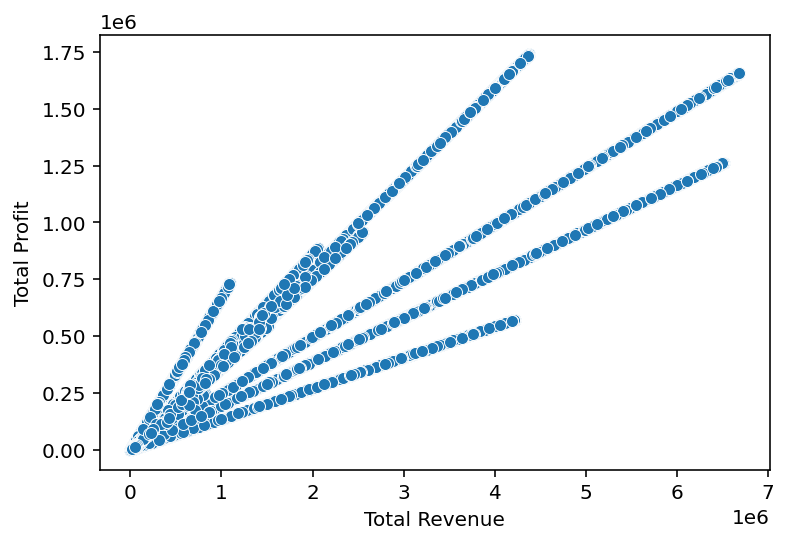

In [38]:
#Plot กราฟ เพื่อดูแนวโน้มต่างๆของ Data
sns.scatterplot(x='Total Revenue',y='Total Profit',data=data)

<AxesSubplot:xlabel='month', ylabel='Total Profit'>

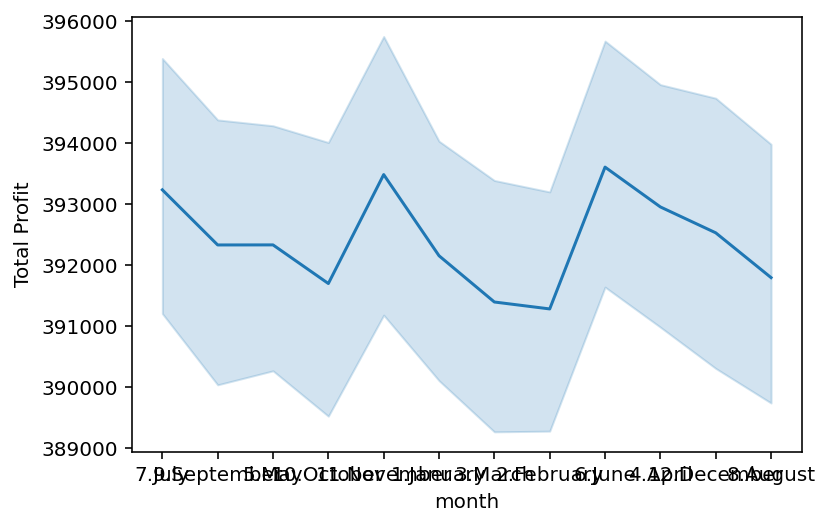

In [39]:
sns.lineplot(x='month',y='Total Profit',data=data)

<AxesSubplot:xlabel='month', ylabel='Total Profit'>

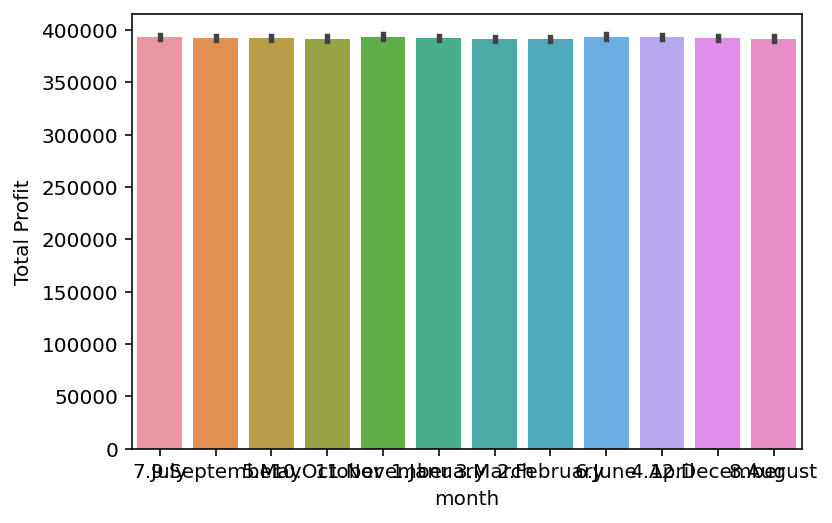

In [40]:
sns.barplot(x='month',y='Total Profit',data=data)

<AxesSubplot:xlabel='year', ylabel='%margin'>

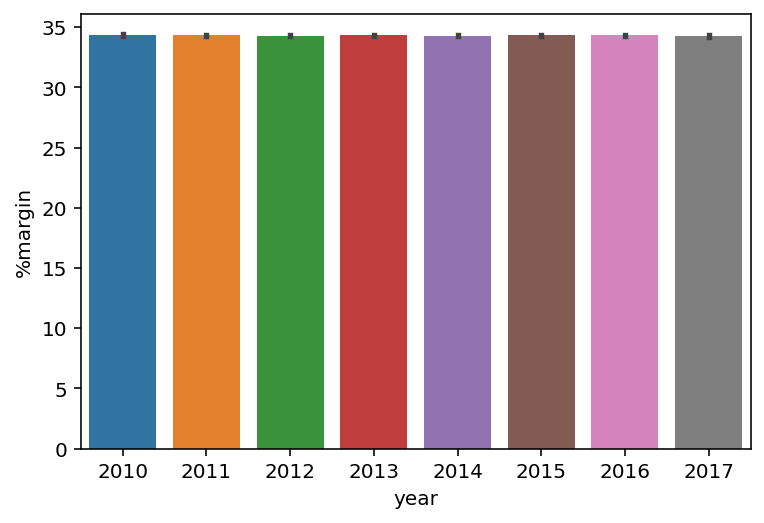

In [41]:
sns.barplot(x='year',y='%margin',data=data)

<AxesSubplot:xlabel='year', ylabel='%margin'>

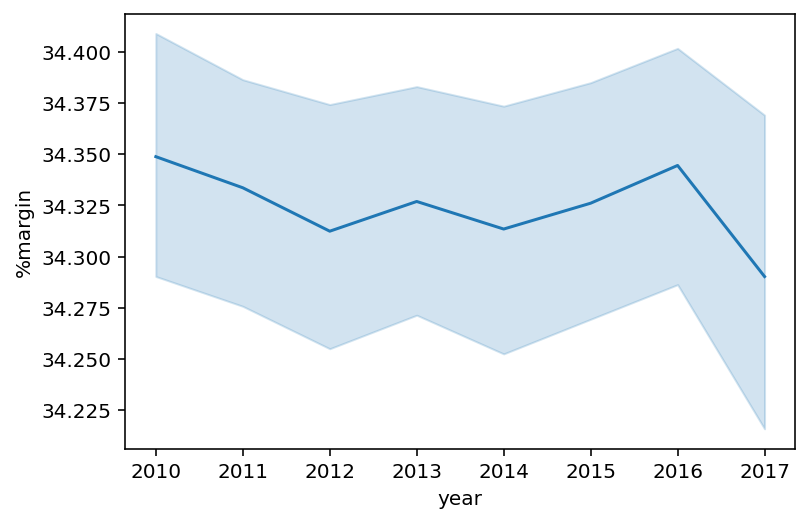

In [42]:
sns.lineplot(x='year',y='%margin',data=data)

<AxesSubplot:xlabel='year', ylabel='%margin'>

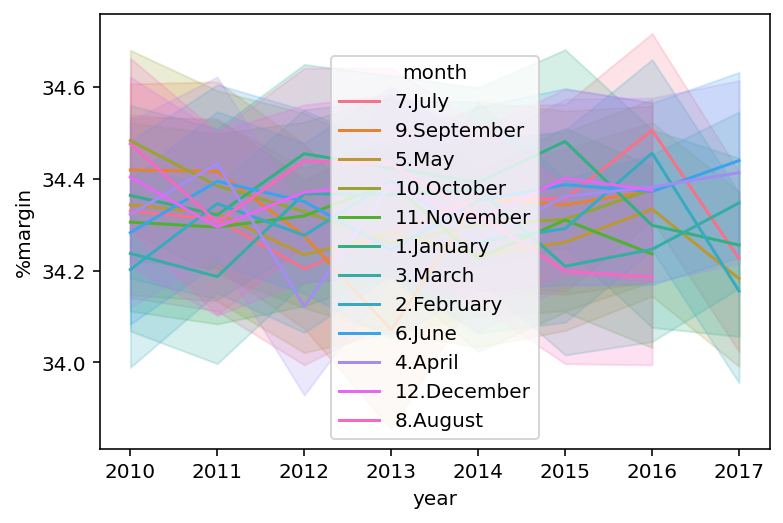

In [43]:
sns.lineplot(x='year',y='%margin',data=data,hue='month')

In [44]:
#Set กราฟให้ใหญ่ขึ้น
sns.set(rc={'figure.figsize':(10,8.24)})

<AxesSubplot:xlabel='year', ylabel='%margin'>

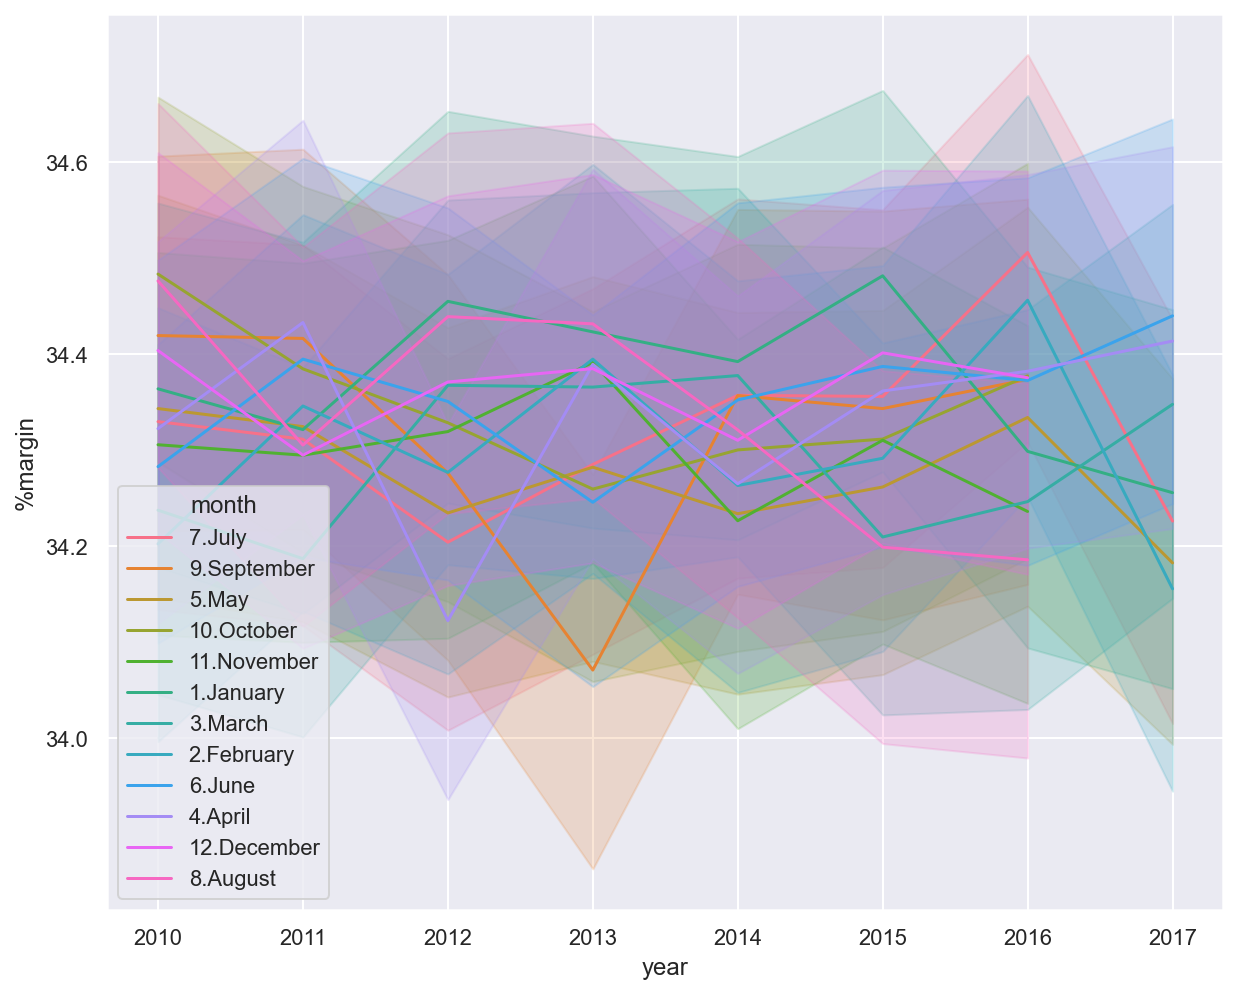

In [45]:
sns.lineplot(x='year',y='%margin',data=data,hue='month')

In [46]:
#สร้างตัวแปร margin_top10 มาเก็บค่า มากไปน้อยของ '%margin'
margin_top10=data.sort_values('%margin',ascending=False).head(10)
margin_top10

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.2,good,2014,2.February
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,good,2011,2.February
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.2,good,2010,3.March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.2,good,2013,6.June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.2,good,2011,7.July
780931,Asia,Vietnam,Clothes,Offline,H,2/28/2013,621288716,4/2/2013,1992,109.28,35.84,217685.76,71393.28,146292.48,67.2,good,2013,2.February
1155015,Sub-Saharan Africa,Mali,Clothes,Offline,H,12/13/2015,175936019,1/23/2016,2233,109.28,35.84,244022.24,80030.72,163991.52,67.2,good,2015,12.December
108725,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,good,2011,2.February
1406423,Sub-Saharan Africa,Comoros,Clothes,Offline,C,11/28/2010,882583510,12/2/2010,4929,109.28,35.84,538641.12,176655.36,361985.76,67.2,good,2010,11.November
1043226,Europe,Montenegro,Clothes,Offline,L,5/13/2011,102287709,5/25/2011,8061,109.28,35.84,880906.08,288906.24,591999.84,67.2,good,2011,5.May


<AxesSubplot:xlabel='Country', ylabel='Total Revenue'>

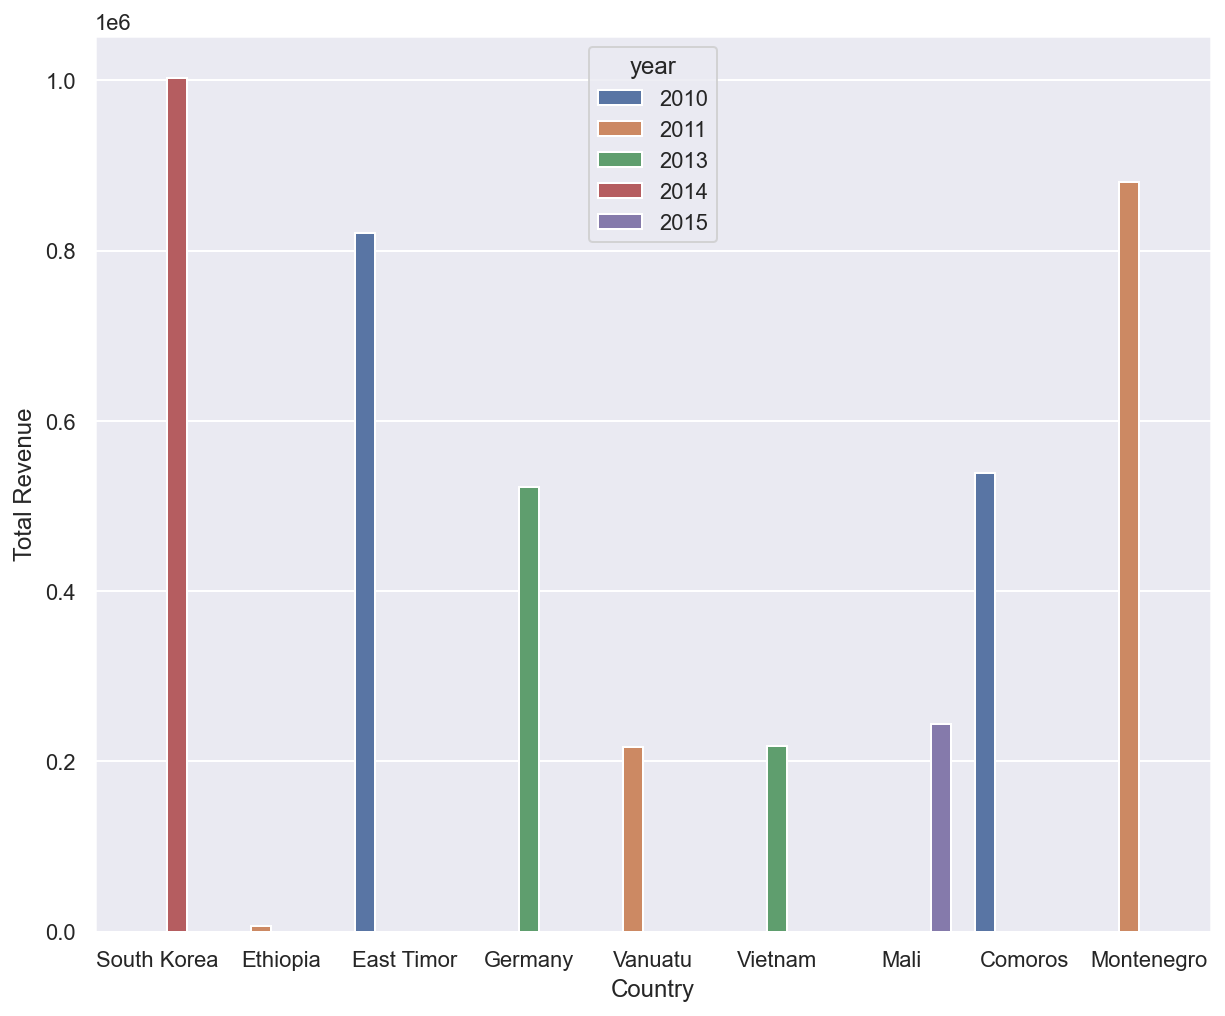

In [47]:
#Plot กราฟ เพื่อดูความแตกต่าง
sns.barplot(x='Country',y='Total Revenue',data=margin_top10,hue='year')

In [48]:
#เช็คค่า 'Total Revenue'  ของ margin_top10
margin_top10['Total Revenue']

1087185    1002316.16
108726        5901.12
1155029     821129.92
402045      522467.68
402047      217030.08
780931      217685.76
1155015     244022.24
108725        5901.12
1406423     538641.12
1043226     880906.08
Name: Total Revenue, dtype: float64

([<matplotlib.patches.Wedge at 0x1d084a307c0>,
 [Text(-0.7142252708357255, 0.8365896619607696, 'Asia'),
  Text(-1.087096467668054, 0.1679918747548222, 'Sub-Saharan Africa'),
  Text(-0.9999733794814301, -0.4583156557750216, 'Australia and Oceania'),
  Text(-0.2118141534257815, -1.0794140838475843, 'Europe'),
  Text(0.35394443536457754, -1.0415005216870756, 'Australia and Oceania'),
  Text(0.6516815109194248, -0.8861778649491171, 'Asia'),
  Text(0.9008564855863037, -0.6312349739812377, 'Sub-Saharan Africa'),
  Text(0.9975584450996502, -0.46354843178503846, 'Sub-Saharan Africa'),
  Text(1.0985652110110093, -0.056164732317856736, 'Sub-Saharan Africa'),
  Text(0.6400882575358631, 0.8945876271024001, 'Europe')],
 [Text(-0.38957742045585025, 0.45632163379678337, '22.5%'),
  Text(-0.5929617096371202, 0.09163193168444846, '0.1%'),
  Text(-0.5454400251716891, -0.2499903576954663, '18.4%'),
  Text(-0.11553499277769899, -0.5887713184623186, '11.7%'),
  Text(0.19306060110795137, -0.5680911936474957

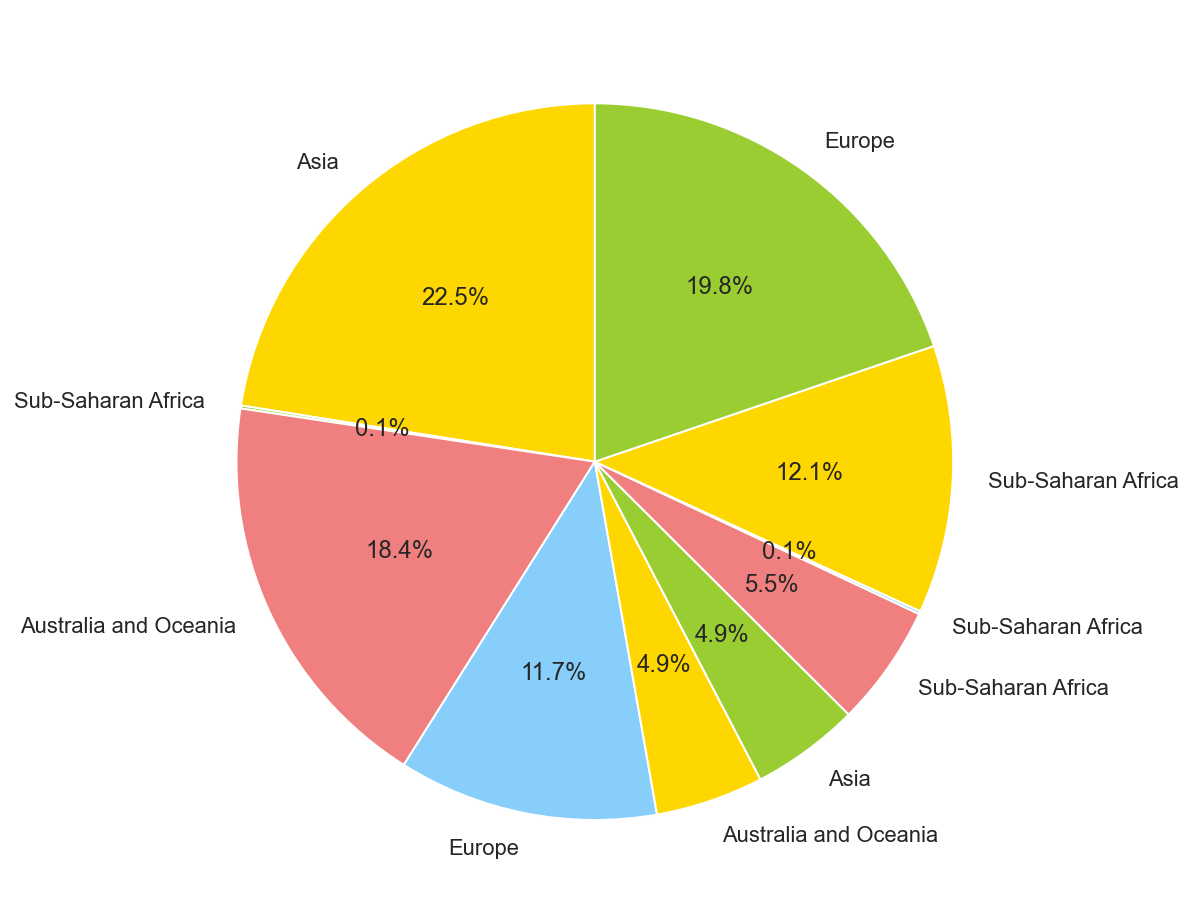

In [49]:
#Plot กราฟ เพื่อดูผลลัพธ์
color=['gold','yellowgreen','lightcoral','lightskyblue']
plt.pie(margin_top10['Total Revenue'],labels=margin_top10['Region'],colors=color,startangle=90,autopct='%1.1f%%')

# Machine Learning

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
#สร้างตัวแปรมาเก็บค่า
model=LinearRegression()
model

LinearRegression()

model=LinearRegression()
model

In [52]:
#กำหนดค่าตัวแปร x, y
x=data[['Total Revenue','Total Cost']]
y=data['%margin']

In [53]:
#เทรนด์ตัวแปร
model.fit(x,y)

LinearRegression()

In [54]:
#หาค่า R *ค่า R ยิ่งมากยิ้งแม่นยำ
model.score(x,y)

0.5312463604621267

In [55]:
model.coef_

array([ 3.38013701e-05, -4.75858163e-05])

In [56]:
#คำนวณจุดตัด
model.intercept_

33.98553431466039

In [57]:
#สร้าง columns ใหม่ โดยใช้ Predict ในการคำนวณ
y_pred=model.predict(data[['Total Revenue','Total Cost']])
y_pred

array([33.9633485 , 33.9633485 , 43.15376114, ..., 36.77049709,
       39.81259888, 34.41462739])

In [58]:
#สร้างตัวแปรเก็บค่า '%margin'
y_act=data[['%margin']]

In [59]:
#gช็คประสิทธิภาพ Model +-9
mean_squared_error(y_act,y_pred)**0.5

9.0037347238968

In [60]:
#สร้าง columns ใหม่และเอา Model ที่ได้มาคำนวณ
data['model']=model.predict(data[['Total Revenue','Total Cost']])

In [61]:
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month,model
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed,2012,7.July,33.963348
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bed,2012,7.July,33.963348
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9.September,43.153761
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9.September,43.153761
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bed,2015,5.May,32.871834


In [62]:
#สร้างตัวแปรเก็บค่า '%margin' จากมากไปน้อย 1000ค่า
margin_top1000_model=data.sort_values('%margin',ascending=False).head(1000)
margin_top1000_model

,Region,Country,Item_Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month,model
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.2,good,2014,2.February,52.222571
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,good,2011,2.February,34.092905
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.2,good,2010,3.March,48.925907
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.2,good,2013,6.June,43.491779
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.2,good,2011,7.July,37.934374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231392,Central America and the Caribbean,Antigua and Barbuda,Clothes,Offline,H,12/2/2012,655836427,1/6/2013,5428,109.28,35.84,593171.84,194539.52,398632.32,67.2,good,2012,12.December,44.778233
709441,Sub-Saharan Africa,Zimbabwe,Clothes,Online,H,6/24/2012,549986588,8/10/2012,2108,109.28,35.84,230362.24,75550.72,154811.52,67.2,good,2012,6.June,38.176951
830646,Europe,Poland,Clothes,Offline,L,5/4/2011,222486293,6/22/2011,7493,109.28,35.84,818835.04,268549.12,550285.92,67.2,good,2011,5.May,48.884151
1406098,Europe,Serbia,Clothes,Offline,L,7/19/2011,341827428,8/9/2011,3187,109.28,35.84,348275.36,114222.08,234053.28,67.2,good,2011,7.July,40.322368


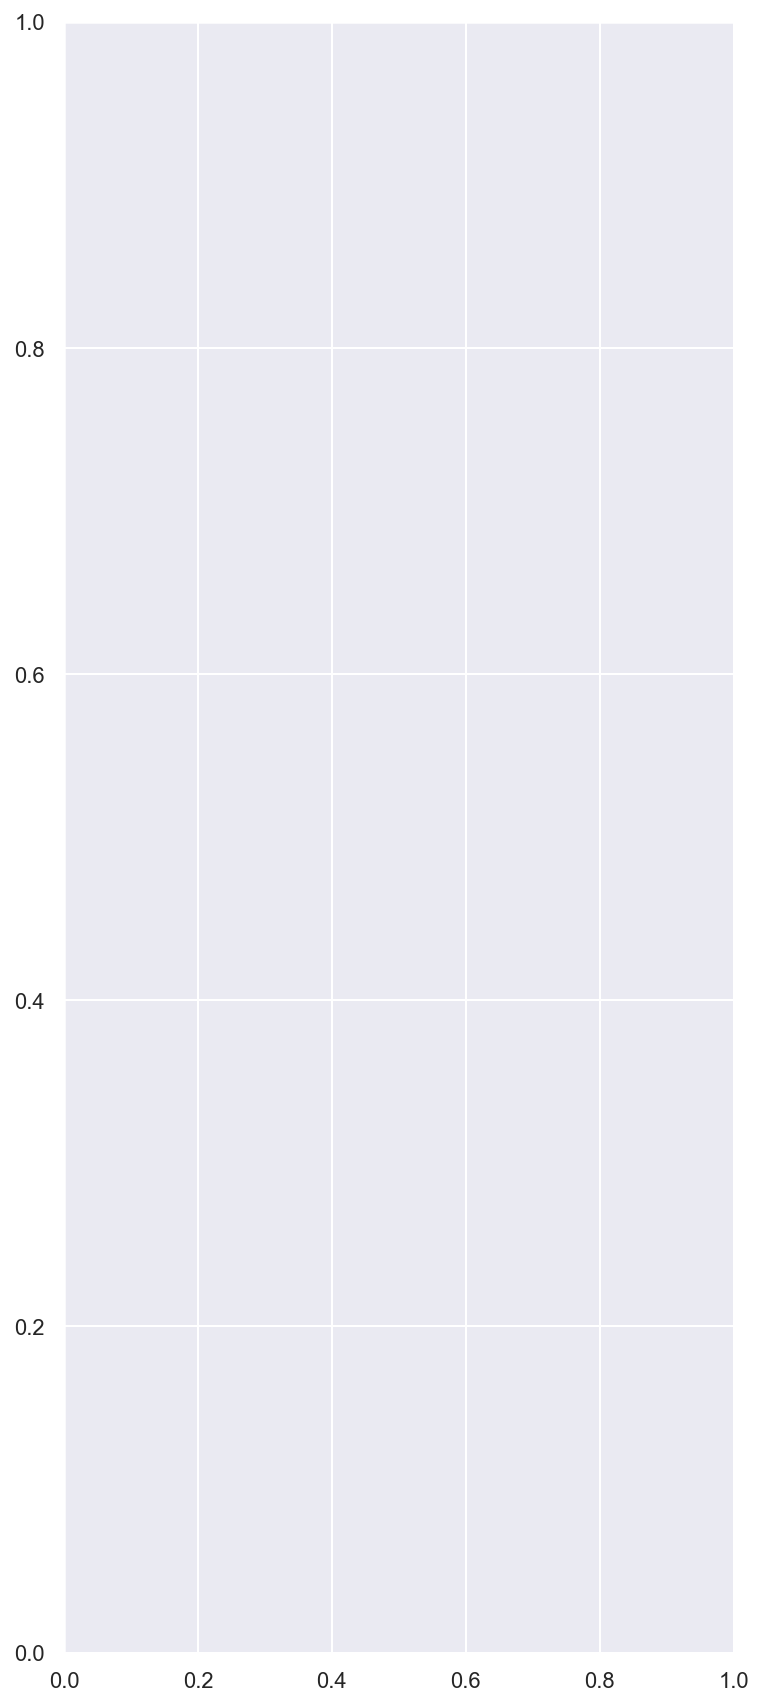

In [63]:
#สร้าง Plot เปล่าขึ้นมาเพื่อที่จะ Plot กราฟลงไป
f, ax=plt.subplots(figsize=(6,15))

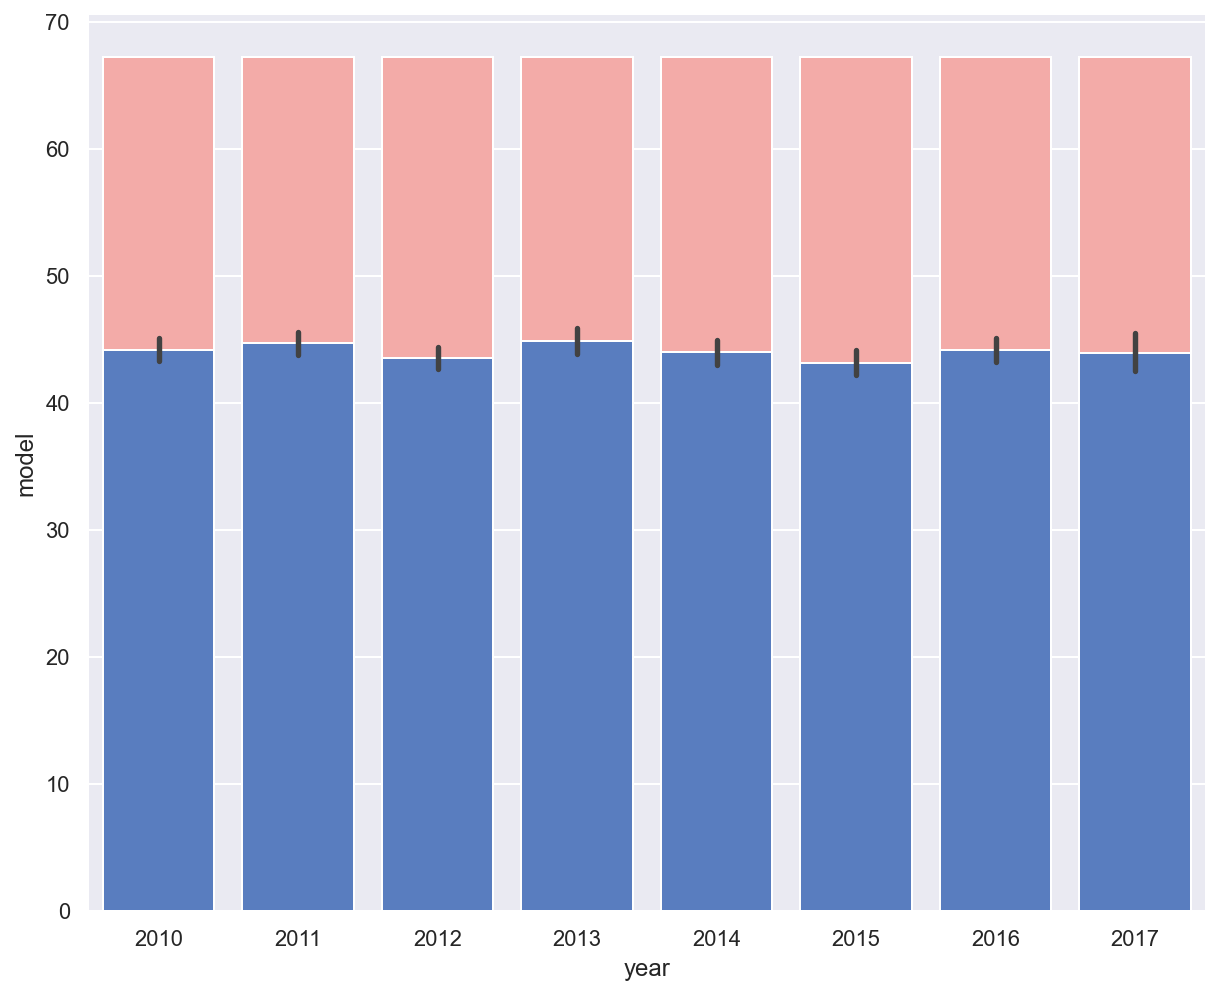

In [64]:
#Plot กราฟ 'Actual Vs Prediction' เพื่อดูความแม่นยำของ Machine Learning
sns.set_color_codes('pastel')
sns.barplot(x='year',y='%margin',data=margin_top1000_model,label='Actual',color='r')

sns.set_color_codes('muted')
sns.barplot(x='year',y='model',data=margin_top1000_model,label='Prediction',color='b')

ax.set(ylabel="",xlabel='Actual Vs Prediction')
sns.despine(left=True,bottom=True)
